In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import math

In [3]:
smoking_data = pd.read_csv('Raw Data_GeneSpring.txt', sep='\t')

In [4]:
smoking_data.head()

,ProbeName,GSM1149106_M_Ns3.txt:gProcessedSignal(normalized),GSM1149107_M_Ns4.txt:gProcessedSignal(normalized),GSM1149108_M_Ns5.txt:gProcessedSignal(normalized),GSM1149109_M_Ns6.txt:gProcessedSignal(normalized),GSM1149110_M_Ns7.txt:gProcessedSignal(normalized),GSM1149111_M_Ns8.txt:gProcessedSignal(normalized),GSM1149112_M_Ns9.txt:gProcessedSignal(normalized),GSM1149113_M_Ns10.txt:gProcessedSignal(normalized),GSM1149114_M_Ns11.txt:gProcessedSignal(normalized),...,GSM1149147_F_Sm6.txt:gProcessedSignal(normalized),GSM1149148_F_Sm7.txt:gProcessedSignal(normalized),GSM1149149_F_Sm8.txt:gProcessedSignal(normalized),GSM1149150_F_Sm9.txt:gProcessedSignal(normalized),GSM1149151_F_Sm10.txt:gProcessedSignal(normalized),GSM1149152_F_Sm11.txt:gProcessedSignal(normalized),GSM1149153_F_Sm12.txt:gProcessedSignal(normalized),GeneSymbol,EntrezGeneID,Go
0,GE_BrightCorner,17.288560,18.103434,18.280110,17.883734,17.879555,17.340961,16.226210,16.203045,15.940904,...,16.039999,15.783204,14.843888,15.553449,15.912829,15.604271,16.120403,NaN,NaN,NaN
1,DarkCorner,2.172766,0.075925,0.232402,0.052573,0.483300,0.240482,0.327676,0.041980,0.015175,...,0.232663,0.023183,0.104347,0.055785,0.141535,0.113465,0.592137,NaN,NaN,NaN
2,A_24_P66027,11.954556,11.681619,11.831579,12.262896,11.233925,11.722222,11.582652,13.039122,12.615288,...,12.446932,12.315217,11.945836,11.924950,13.129469,12.378983,13.259206,APOBEC3B,9582.0,GO:0051607|GO:0047844|GO:0045087|GO:0008152|GO...
3,A_32_P77178,6.224496,6.963845,7.096990,7.319873,6.611215,6.760409,7.810502,8.377619,8.169108,...,7.813999,7.763040,7.712591,7.165883,8.364161,6.885972,9.458718,NaN,NaN,NaN
4,A_23_P212522,9.328137,9.164498,8.934509,9.166321,9.175541,8.810351,10.665818,10.681737,10.359045,...,10.240832,9.757538,9.847317,9.931273,10.160020,10.282162,11.035402,ATP11B,23200.0,GO:0005515|GO:0000287|GO:0005794|GO:0005886|GO...


In [5]:
smoking_data.shape

(41093, 52)

In [6]:
#Drop all rows with GeneSymbol = NaN
smoking_data = smoking_data.dropna(subset=['GeneSymbol'])

In [7]:
#Drop all rows with EntrezGeneID = NaN
smoking_data = smoking_data.dropna(subset=['EntrezGeneID'])

In [8]:
smoking_data.head()
# smoking_data.shape

,ProbeName,GSM1149106_M_Ns3.txt:gProcessedSignal(normalized),GSM1149107_M_Ns4.txt:gProcessedSignal(normalized),GSM1149108_M_Ns5.txt:gProcessedSignal(normalized),GSM1149109_M_Ns6.txt:gProcessedSignal(normalized),GSM1149110_M_Ns7.txt:gProcessedSignal(normalized),GSM1149111_M_Ns8.txt:gProcessedSignal(normalized),GSM1149112_M_Ns9.txt:gProcessedSignal(normalized),GSM1149113_M_Ns10.txt:gProcessedSignal(normalized),GSM1149114_M_Ns11.txt:gProcessedSignal(normalized),...,GSM1149147_F_Sm6.txt:gProcessedSignal(normalized),GSM1149148_F_Sm7.txt:gProcessedSignal(normalized),GSM1149149_F_Sm8.txt:gProcessedSignal(normalized),GSM1149150_F_Sm9.txt:gProcessedSignal(normalized),GSM1149151_F_Sm10.txt:gProcessedSignal(normalized),GSM1149152_F_Sm11.txt:gProcessedSignal(normalized),GSM1149153_F_Sm12.txt:gProcessedSignal(normalized),GeneSymbol,EntrezGeneID,Go
2,A_24_P66027,11.954556,11.681619,11.831579,12.262896,11.233925,11.722222,11.582652,13.039122,12.615288,...,12.446932,12.315217,11.945836,11.924950,13.129469,12.378983,13.259206,APOBEC3B,9582.0,GO:0051607|GO:0047844|GO:0045087|GO:0008152|GO...
4,A_23_P212522,9.328137,9.164498,8.934509,9.166321,9.175541,8.810351,10.665818,10.681737,10.359045,...,10.240832,9.757538,9.847317,9.931273,10.160020,10.282162,11.035402,ATP11B,23200.0,GO:0005515|GO:0000287|GO:0005794|GO:0005886|GO...
5,A_24_P934473,6.784073,6.776234,6.684156,6.220987,5.923483,6.219626,8.875294,7.844176,7.824461,...,7.096265,6.978835,6.562293,6.714188,7.573987,6.647150,7.652528,METTL22,79091.0,GO:0008168|GO:0005634|GO:0032259
6,A_24_P9671,11.231391,12.073792,11.931393,12.758203,11.523391,12.085002,13.651166,13.555499,13.658414,...,13.353139,13.437815,12.957280,13.218200,13.584692,12.926903,14.160157,DNAJA1,3301.0,GO:0006986|GO:0005515|GO:0048471|GO:0009408|GO...
8,A_24_P801451,7.066391,7.629956,7.423323,6.849318,6.807059,6.654153,7.359266,6.954688,6.706116,...,6.956726,6.344813,6.191489,6.432817,6.877969,6.164638,6.736359,EHMT2,10919.0,GO:0005515|GO:0000790|GO:0016571|GO:0006325|GO...


In [9]:
smoking_data.shape

(31502, 52)

In [10]:
N = []
D = []
for j in range(0, 48):
    if j < 12:
        N.append([1, 0, 1, 0])
        D.append([1, 0, 0, 0])
    elif j < 24:
        N.append([1, 0, 0, 1])
        D.append([0, 1, 0, 0])
    elif j < 36:
        N.append([0, 1, 1, 0])
        D.append([0, 0, 1, 0])
    else:
        N.append([0, 1, 0, 1])
        D.append([0, 0, 0, 1])
N = np.array(N)
D = np.array(D)

In [11]:
print(f"Shape of N: {N.shape}")
print(f"Shape of D: {D.shape}")
# print(f"N is {N}")
# print(f"D is {D}")
print(f"last 12 rows of N are {N[-12:]}")

Shape of N: (48, 4)
Shape of D: (48, 4)
last 12 rows of N are [[0 1 0 1]
 [0 1 0 1]
 [0 1 0 1]
 [0 1 0 1]
 [0 1 0 1]
 [0 1 0 1]
 [0 1 0 1]
 [0 1 0 1]
 [0 1 0 1]
 [0 1 0 1]
 [0 1 0 1]
 [0 1 0 1]]


In [12]:
rank_N = 3
rank_D = 4
n = 48

In [13]:
X = smoking_data.iloc[0, 1:49].values
X = list(X)
for i in range(len(X)):
    X[i] = math.pow(2, X[i])
print(X)

[3968.9894165284095, 3284.866445477722, 3644.686474155058, 4914.728479890831, 2408.509668464828, 3378.628473978071, 3067.0840771078956, 8417.184351704818, 6274.513989649256, 8368.66626565056, 5994.260222200799, 5434.177595453851, 4445.059453001863, 2808.824947851471, 3319.4810486232273, 4370.290603732736, 1937.1379750460248, 3341.5945956237115, 3693.615560564828, 4930.362473059569, 4458.157900465311, 8095.968716439266, 4197.771726136947, 6220.052318683823, 3225.694288821701, 8981.46455082615, 3304.337881076367, 2731.76941978712, 1146.119691450075, 3845.040289699314, 10912.639681645163, 6374.2681688419, 6626.806138985929, 5816.211432034737, 4858.576602926426, 6070.631980076455, 8477.504912979632, 4349.042222866745, 4433.299148236772, 3624.554583791554, 1971.9325639369738, 5583.414704512054, 5096.238214428146, 3945.072231842011, 3888.370564423393, 8961.155140581932, 5326.540074596784, 9804.348153236384]


In [14]:
p_values = []
for i in range(len(smoking_data)):
    X = smoking_data.iloc[i, 1:49].values
    X = list(X)
    for i in range(len(X)):
        X[i] = math.pow(2, X[i])
    X = np.array(X)
    X = X.reshape((48, 1))
    #For each value of X do 2^X
    num = np.dot(np.dot(N, np.linalg.pinv(np.dot(N.T, N))), N.T)
    den = np.dot(np.dot(D, np.linalg.pinv(np.dot(D.T, D))), D.T)
    I = np.eye(48)
    f_statistic = ((n - rank_D)/(rank_D - rank_N)) * ((np.dot(X.T, np.dot(I - num, X))/np.dot(X.T, np.dot(I - den, X))) - 1)
    # #Get p value
    # print(f"f_statistic is {f_statistic}")
    p_value = 1 - stats.f.cdf(f_statistic.item(), rank_D - rank_N, n - rank_D)
    p_values.append(p_value)

<Axes: ylabel='Count'>

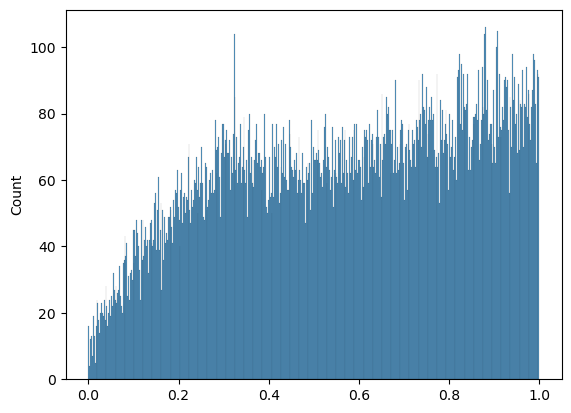

In [22]:
#Make a histogram of p-values
sns.histplot(p_values, bins=500)
# plt.show()

In [16]:
print(f"Number of p-values less than 0.05 is {len([p for p in p_values if p < 0.05])}")
print(f"Number of p-values less than 0.01 is {len([p for p in p_values if p < 0.01])}")
print(f"Number of p-values less than 0.001 is {len([p for p in p_values if p < 0.001])}")


Number of p-values less than 0.05 is 437
Number of p-values less than 0.01 is 52
Number of p-values less than 0.001 is 10
